# Make a fake stead-state landscape using SPACE + Run Hyland for creating landslides.

* Campforts, B., Shobe, C. M., Overeem, I., & Tucker, G. E. (2022). The Art of Landslides: How Stochastic Mass Wasting Shapes Topography and Influences Landscape Dynamics. Journal of Geophysical Research: Earth Surface, 127(8), 1–16. [doi: 10.1029/2022JF006745](https://doi.org/10.1029/2022JF006745)
* Campforts B., Shobe C.M., Steer P., Vanmaercke M., Lague D., Braun J. (2020) HyLands 1.0: a hybrid landscape evolution model to simulate the impact of landslides and landslide-derived sediment on landscape evolution. Geosci Model Dev: 13(9):3863–86, [doi: 10.5194/gmd-13-3863-2020](https://doi.org/10.5194/gmd-13-3863-2020).

### Step 1: Import the necessary libraries 

The BedrockLandslider and SPACE components are required, as are the model grid component and a flow routing component. We will use the `PriorityFloodFlowRouter` that takes care of routing flow across flats or pits in a digital elevation model.

In [1]:
import copy

import matplotlib as mpl
import matplotlib.pyplot as plt  # For plotting results; optional
import numpy as np

from landlab import imshow_grid, imshowhs_grid  # For plotting results; optional
from landlab.io.esri_ascii import write_esri_ascii

import pickle

In [2]:
# Importing pre-landlab grid object
with open('pre-slide_fakelandscape.pickle', 'rb') as g:
    mg = pickle.load(g)

with open('post-slide_fakelandscape.pickle', 'rb') as g2:
    mg2 = pickle.load(g2)

## Visualization of results

### Pre-slide fake landscape
Topography and soil depth

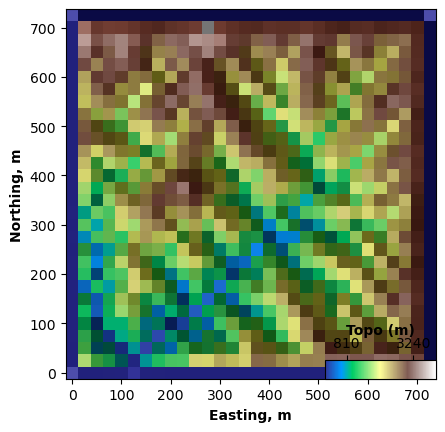

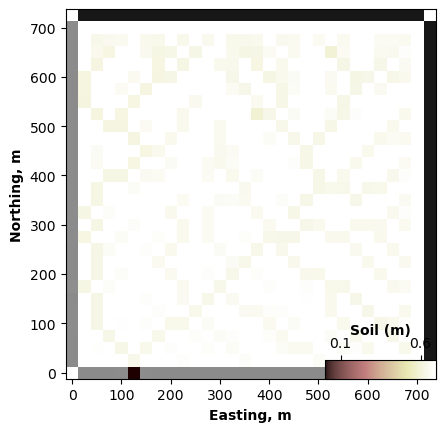

In [3]:
cmap = copy.copy(mpl.colormaps["terrain"])
# Show DEM draped over the shaded topographic relief
imshowhs_grid(
    mg,
    "topographic__elevation",
    var_name="Topo",
    var_units=r"m",
    grid_units=("m", "m"),
    cmap=cmap,
    ticks_km=False,
)
plt.show()
# Show Soil thickness draped over the shaded topographic relief
cmap = copy.copy(mpl.colormaps["pink"])
imshowhs_grid(
    mg,
    "topographic__elevation",
    drape1=mg.at_node["soil__depth"],
    plot_type="Drape1",
    var_name="Soil",
    var_units=r"m",
    grid_units=("m", "m"),
    cmap=cmap,
    ticks_km=False,
)

z_before_LS = np.array(mg["node"]["topographic__elevation"])

### Post-landslide fake landscape

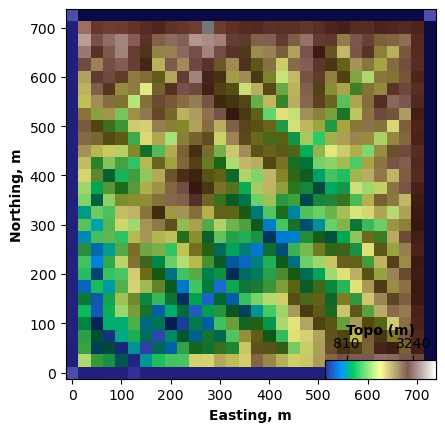

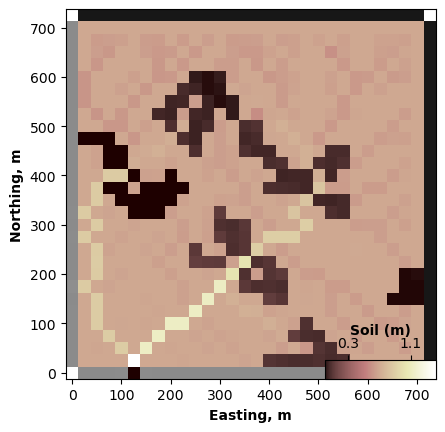

In [4]:
cmap = copy.copy(mpl.colormaps["terrain"])
# Show DEM draped over the shaded topographic relief
imshowhs_grid(
    mg2,
    "topographic__elevation",
    var_name="Topo",
    var_units=r"m",
    grid_units=("m", "m"),
    cmap=cmap,
    ticks_km=False,
)
plt.show()
# Show Soil thickness draped over the shaded topographic relief
cmap = copy.copy(mpl.colormaps["pink"])
imshowhs_grid(
    mg2,
    "topographic__elevation",
    drape1=mg2.at_node["soil__depth"],
    plot_type="Drape1",
    var_name="Soil",
    var_units=r"m",
    grid_units=("m", "m"),
    cmap=cmap,
    ticks_km=False,
)

z_before_LS = np.array(mg2["node"]["topographic__elevation"])

### Location of landslides during last model iteration
Let's plot the resulting landslides 

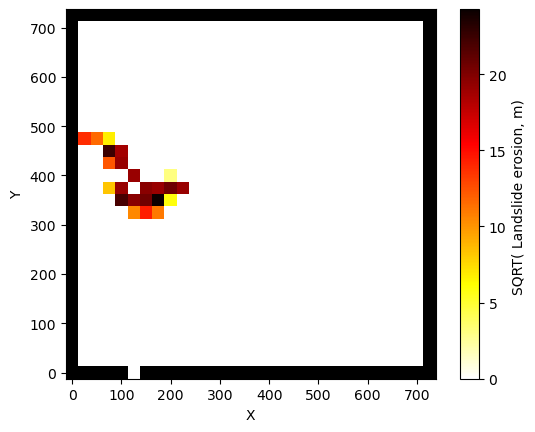

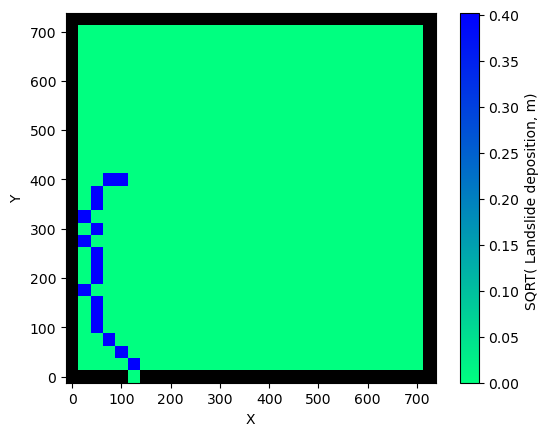

In [5]:
# Landslide Erosion
cmap = copy.copy(mpl.colormaps["hot_r"])
imshow_grid(
    mg2,
    np.sqrt(mg2.at_node["landslide__erosion"]),
    colorbar_label="SQRT( Landslide erosion, m) ",
    cmap=cmap,
)
plt.show()

# Landslide Deposition
cmap = copy.copy(mpl.colormaps["winter_r"])
imshow_grid(
    mg2,
    np.sqrt(mg2.at_node["landslide__deposition"]),
    colorbar_label="SQRT( Landslide deposition, m) ",
    cmap=cmap,
)
plt.show()

## Visualization of results
### Magnitude frequency of landslides simulated over 200 years

In [6]:
LS_size = landslides_size_all_steps * mg.dx**2
counts, bins = np.histogram(np.log10(LS_size), 10)
plt.hist(np.log10(LS_size), log=True, bins=bins, density=True)
plt.xlabel("log10 LS Area, m2")
plt.ylabel("Landslide frequency")

NameError: name 'landslides_size_all_steps' is not defined

### Click here for more <a href="https://landlab.readthedocs.io/en/latest/user_guide/tutorials.html">Landlab tutorials</a>